### Приветствую, проверяющий :)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

%matplotlib inline

### Генерируем выборку бета-распределения
#### Инфо:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html
- https://ru.wikipedia.org/wiki/Бета-распределение

In [2]:
# Задаём два параметра: a и b
a = 2
b = 3

# Задаём распределение величины
beta_rv = sts.beta(a, b)

# Генерируем 1000 значений
beta_sample = beta_rv.rvs(size=1000)

### Гистограмма и плотность распределения:

Text(0.5, 0, '$x$')

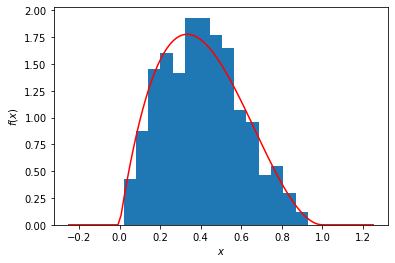

In [3]:
# график плотности распределения - на рисунке отображён красным
x = np.linspace(-0.25, 1.25, 100)
pdf = beta_rv.pdf(x)
plt.plot(x, pdf, color = 'red')

# гистограмма, построенная по нашей выборке -- на рисунке отображена синим
# разбиваем на 25 промежутков, получается лучше, чем с параметром по умолчанию (25 промежутков для 1000 значений - не перебор)
plt.hist(beta_sample, density=True, bins = 15) 

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

### Строим 1000 выборок из n элементов, исследуем распределение выборочных средних

In [4]:
def gen_avgs(n):
    
    avgs = [] #собираем выборочные средние
    
    for i in range(1000): # цикл на 1000 итераций 
        beta_sample = beta_rv.rvs(size=n) #генерируем выборку бета-распределения
        bs_mean = np.mean(beta_sample) #считаем среднее по выборке
        avgs.append(bs_mean)  #добавляем значение в список
    return avgs

### Рассчитываем теоретическую плотность вероятности, строим гистограммы и графики

In [5]:
def plot_gen_avgs(n):
    
    sample = gen_avgs(n)
    
    # ТУТ СЧИТАЕМ ТЕОРЕТИЧЕСКИЕ СТАТИСТИКИ
    theor_beta_mean = a/(a+b) # теоретическое математическое ожидание бета-распределения
    theor_beta_disp = (a*b) / ( (a+b)**2 * (a*b+1) ) #теоретическая дисперсия бета-распределения

    theor_avgs_mean = theor_beta_mean # теоретическое математическое ожидание среднего выборочного
    theor_avgs_std = math.sqrt(theor_beta_disp / n)  # теоретическая дисперсия среднего выборочного 
    
    norm_rv = sts.norm(loc=theor_avgs_mean, scale=theor_avgs_std) # нормальное распределение, искомое по ЦПТ
    
    x = np.linspace(0,0.8,100)  # строим на промежутке [0, 0.8]
    pdf = norm_rv.pdf(x)

    plt.plot(x, pdf, linewidth = 2.5, color = 'red') # график теоретической плотности распределения выборочного среднего
    plt.hist(sample, density = True, bins = 15) # гистограмма, построенная по набору средних значений выборок
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

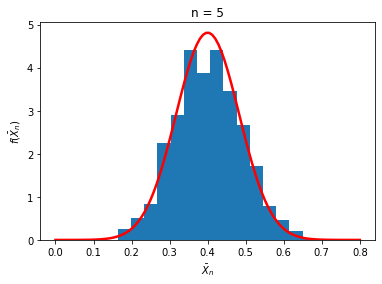

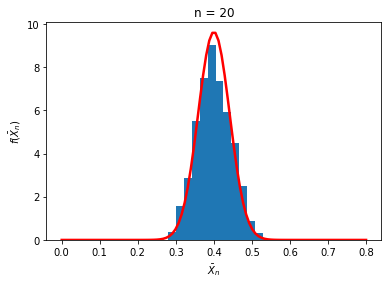

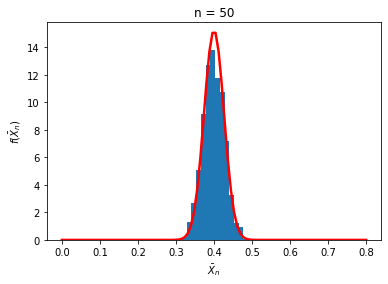

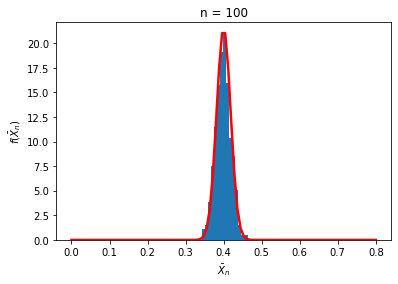

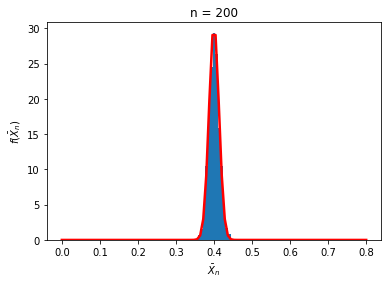

In [6]:
for n in [5, 20, 50, 100, 200]: #строим гистограммы и графики для различных значений n
    plot_gen_avgs(n)

### Вывод: 
Видим, что больше объем выборки (n), тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению. Также можем видеть что с увеличением размера выборок уменьшается дисперсия распределения выборочных средних, график визуально становится более "высоким" и "узким"